## *Homework Assignment 3A - Multi Layer Perceptron*
#### The main goal of this assignment was to build from scratch a MLP to perform binary classification on a given dataset. Our MLP is made up of two hidden layers with 10 neurons each of them.


### _Activation and Loss function_

In order to build the MLP we first choose the activation functions for the hidden and output layers. For the former we opted for a **Relu** function defined as {formulaLatex} and for the output node we used a **Sigmoid** function.
We used the sigmoid function in order to get as output value a probability distribution for the two classes [0 and 1]. For the hidden layers, instead, we prefered using the **Relu** function because it is less affacted by the vanishing gradient problem. The derivative of the sigmoid function ( used during the backpropagation algorithm) has a small range and thus this can easily leads neurons to saturate, especially when the network is enough deep. Although Relu function is easier to compute compared to sigmoid that requires exponentials, it must be noted that neurons can be affected by the **dying relu** problem: if too many neurons get below zero the network itself will use less neurons to improve its learning.


The definitions and plots of our activation functions are shown below

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def relu(x,deriv=False):
    if deriv:
        der = np.zeros(x.shape)
        der[x>0] = 1
        return der
    return x*(x>=0)

def sigmoid(z,deriv=False):
    if deriv:
        return sigmoid(z)*(1-sigmoid(z))
    return (1/(1+np.exp(-z)))

Text(0.5, 1.0, 'Relu')

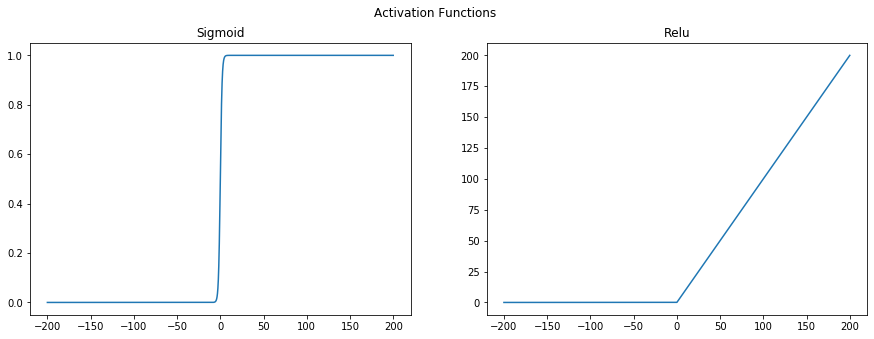

In [5]:
x = np.linspace(-200,200,100000)
y_sig = sigmoid(x)
y_relu = relu(x)

fig, axs = plt.subplots(1,2,figsize=(15,5))
fig.suptitle('Activation Functions')
axs[0].plot(x,y_sig)
axs[0].set_title('Sigmoid')
axs[1].plot(x,y_relu)
axs[1].set_title('Relu')

### _Learning rate, batch size, initialization._

#### In order to train the neural network is importat to initialize some parameters used by the algorithm. 
We first have to specify the **learning rate** that control how much to change the layers weigths after computing the gradient of the error. In order to train the model we use the Stocastich gradient descent (multi-batch) which is an optimization algorithm that try to minimize a function by computing its gradient.  Since the learning rate can be thought as a step size towards the minimum, a small value can lead to a slow training or to get stuck in a local minimum. Conversely, a too large value can cause the model to _bounce around_ the minimum and therefore  the loss function may diverge.

When we update the weigths we use samples of training observations to perform the feedforward and the backpropagation pass. Since the size of a dataset can be huge we do not use in each epoch (i.e. a single pass to update weights) all the data. Instead, we use a **batch** of obeservations to speed up the training algorithm and reduce the memory space. As  __batch_size__ we pick 16 random observation in the dataset. The literature suggests to use batch sizes that are power of two because it works better with CPU/GPU architecture. Also, [it has been observed](https://arxiv.org/abs/1609.04836) that larger batch size can worsen the quality of the model (i.e. ability to generalize)

Another important aspect is the initialization of the weigths and biases for each layer. We initialized **biases** to zero and then we use gradient descent to learn appropiate biases.
When we talk about **weigths** initialization, instead, we have to pay more attention because the starting values can have a direct impact on the quality of the traning. We must notice that for each neuron in each hidden layer we have a weighted sum over all previous weights and neurons. If the sum is distribuited in a certain way, we may have a big value of |z| and therefore when we feed the sigmoid function with the computed value, we will have a result very close to either 0 or 1 meaning that the neuron has saturated. Also, if we make small changes in the weigths (after the backpropagation algorithm), we will not see big changes in the activation functions and hence we will have a model that learn slowly.
This is why we decided to use the **Kaiming** weigths initializations that takes into account nonlinearities leading to [better performance](https://arxiv.org/abs/1502.01852) with Relu activation functions

### Training

Once all initialization parameters are defined, it is possible to start training the MLP model. In order to do so we must first define the number of epochs we want to use for the learning process. As it possible to see in the code below we opt for 200 epochs but we must notice that we use the **early stopping** technique. Every time we update the weights (for each epoch) we compute the error of the validation set and if the error does not decrease for more than _k_ epochs, it means that we are not learning anymore or, worse, we may have overfitting.
In this assignment we do not use a validation set, hence, we compute directly the error on the test test. This might lead to generalize  poorly the model since we are tuning directly the hyperparameter for the test set.  In our example we used  _early_stopping_  = 5 (i.e. time window size to check whether the error on the test is not improving) but it is possible to modify it through the __model.train()__ method.


```python
    n_epochs = 200
    nn_architecture = {
            'layers':[(10,2),(10,10),(1,10)],
            'activations':[relu,relu,sigmoid]
             }
    mlp = MLP(nn_architecture)
    mlp.train(df,df_test,epochs=n_epochs,batch_size=16,lr=0.3)
```

In order to get feedback on the traning we can plot the loss function for both training and validation (our case test) set. Although we used 200 epochs to train the model, it is possible to see in the image below that the condition of early stopping is reached about at the 135-th epoch

![costFunction](cost_functionImage.png)


With this model and the previous hyperparameters selection, we obtain an accuracy of the 97.560% on the training set. As it is possible to see in the confusion matrix, only two observations have been not classified correctly.

![confMtx](cmtx.png)